In [1]:
# Load Imports
import matplotlib.pyplot
from pyvis.network import Network
import community
import networkx
import pandas
import numpy
import spacy
import datetime
import json
import os

In [6]:
with open("./BKPs/list_df.json") as f:
    list_df = json.load(f)
    

In [15]:
frames = [pandas.DataFrame(df) for df in list_df]
df_all_relation_ships = pandas.concat(frames).reset_index(drop=True)

In [22]:
unique_relation = df_all_relation_ships[["source", "target"]]

In [29]:
unique_relation.drop_duplicates(subset=["source", "target"], keep=False).reset_index(drop=True)
unique_relation = pandas.DataFrame(numpy.sort(unique_relation.values, axis=1), columns=unique_relation.columns)

In [56]:
for index, row in unique_relation.iterrows():
    iteration = df_all_relation_ships.loc[((df_all_relation_ships['source'] == row.source) & (df_all_relation_ships['target'] == row.target))]["value"].sum()
    unique_relation.loc[index, "value"] = iteration

In [59]:
Gph = networkx.from_pandas_edgelist(unique_relation, source="source", target="target", edge_attr="value", create_using=networkx.Graph())

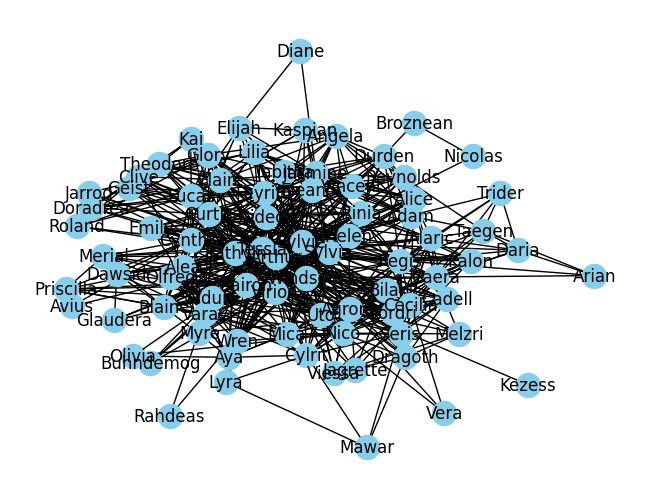

In [60]:
pos = networkx.kamada_kawai_layout(Gph)
networkx.draw(Gph, with_labels=True, node_color="skyblue", edge_cmap=matplotlib.cm.Blues, pos=pos)

In [61]:
net = Network(notebook=True, width="1800px", height="920px", bgcolor="#121212", font_color="white")

In [62]:
# Node Attributes
node_degree = dict(Gph.degree)
degree_dict = networkx.degree_centrality(Gph)
betweenness_dict = networkx.betweenness_centrality(Gph)
closeness_dict = networkx.closeness_centrality(Gph)
communities = community.best_partition(Gph)

In [64]:
# Set Node Attributes
networkx.set_node_attributes(Gph, node_degree, "size")
networkx.set_node_attributes(Gph, degree_dict, "degree_centrality")
networkx.set_node_attributes(Gph, betweenness_dict, "betweenness_centrality")
networkx.set_node_attributes(Gph, closeness_dict, "closeness_centrality")
networkx.set_node_attributes(Gph, communities, "group")

In [70]:
net.from_nx(Gph)
net.repulsion()
net.show_buttons(filter_=["physics"])
net.show(f"./Networks/AllNovel.html")